#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

*Enter your answer in this cell*

Numeric data: EDA you can perform on numeric data are:
- Statistics: mean, median, standard deviation, variance.
- visualization: histogram, boxplot, scatter plots, correlation analysis.

Categorical data: 
- frequency plots
- bar plots, pie charts 

To explore the relationship between categorical and numeric data we can use:
- Boxplots, violin plots
- histograms 

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [39]:
# Your code here
import pandas as pd
df = pd.read_csv("us_weather_synthetic.csv")
df.head()

,State,AvgTemperature_F,Rainfall_in
0,Florida,79.481680,5.496035
1,Florida,67.855284,6.140842
2,Georgia,53.725294,5.791707
3,Texas,68.867717,2.424555
4,New York,55.726438,2.774461


In [40]:
# Your code here
df.shape

(1000, 3)

,count,mean,std,min,25%,50%,75%,max
AvgTemperature_F,1000.0,60.707906,10.138075,29.38916,53.110286,60.246054,68.068928,90.029617
Rainfall_in,1000.0,3.361118,1.379138,0.00000,2.447435,3.342605,4.257282,8.978448


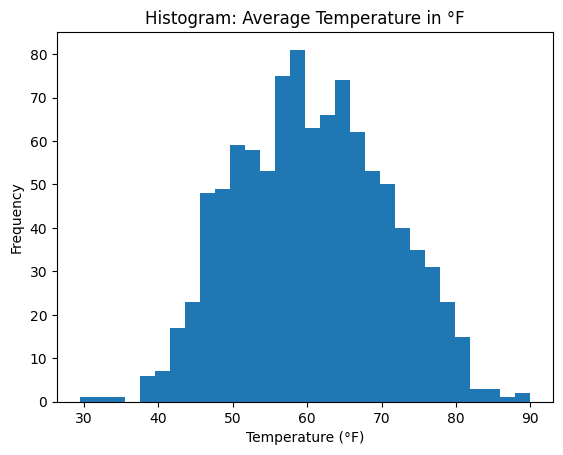

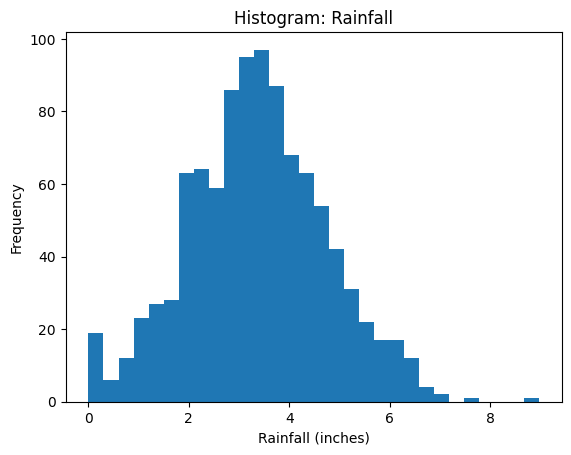

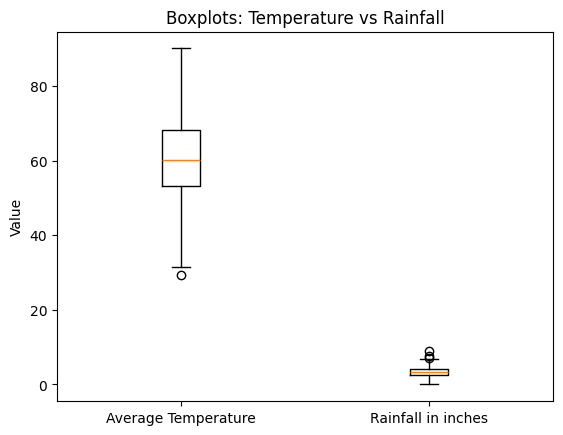

In [41]:
# Your code here - Numeric data EDA
import matplotlib.pyplot as plt
# Summary statistics for numeric columns
display(df[["AvgTemperature_F", "Rainfall_in"]].describe().T)

# Histograms
plt.figure()
plt.hist(df["AvgTemperature_F"], bins=30)
plt.title("Histogram: Average Temperature in °F")
plt.xlabel("Temperature (°F)"); plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df["Rainfall_in"], bins=30)
plt.title("Histogram: Rainfall")
plt.xlabel("Rainfall (inches)"); plt.ylabel("Frequency")
plt.show()

# boxplots
plt.figure()
plt.boxplot([df["AvgTemperature_F"], df["Rainfall_in"]],
            labels=["Average Temperature", "Rainfall in inches"])
plt.title("Boxplots: Temperature vs Rainfall")
plt.ylabel("Value")
plt.show()

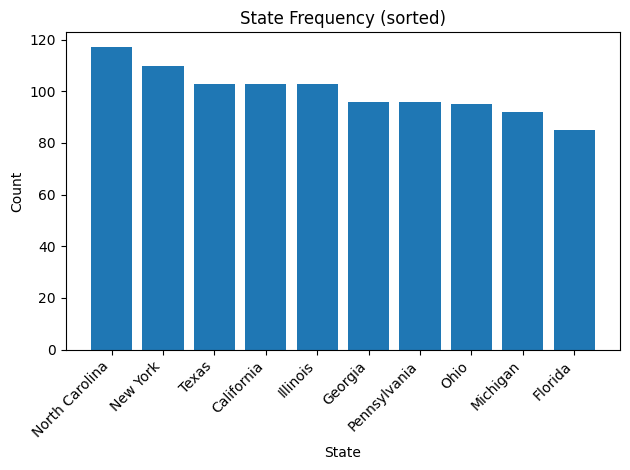

In [42]:
# Your code here - Categorical data EDA 
counts_sorted = df["State"].value_counts(dropna=False).sort_values(ascending=False)
labels = counts_sorted.index.astype(str)

plt.figure()
plt.bar(range(len(counts_sorted)), counts_sorted.values)
plt.title("State Frequency (sorted)")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()
# this chart helps us check the data imbalance or the sample spread within the categories.

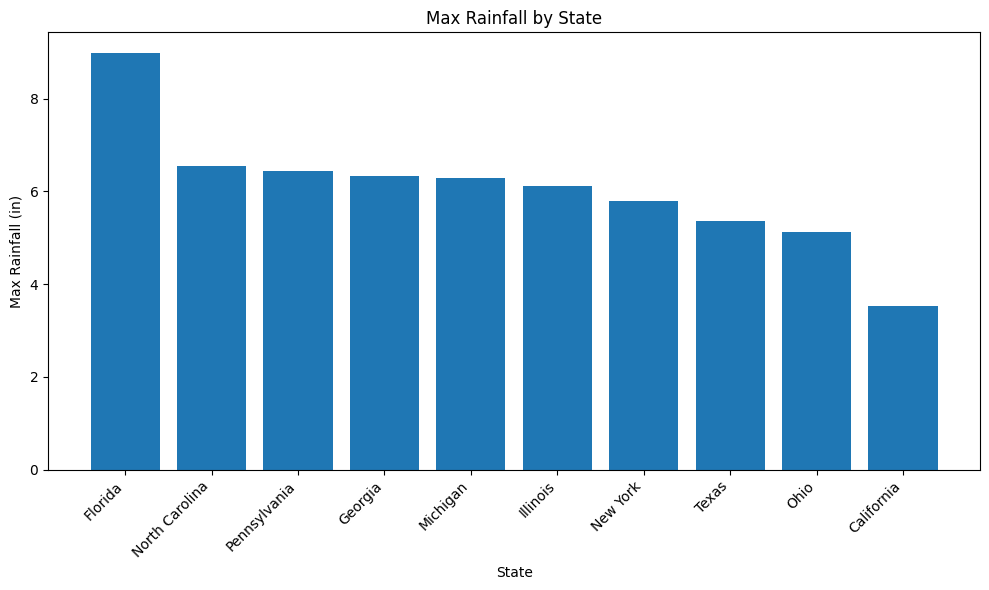

In [43]:
# Your code here - relation between numeric and categorical data 

max_rain = (
    df.groupby("State")["Rainfall_in"]
      .max()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
plt.bar(max_rain.index.astype(str), max_rain.values)
plt.title("Max Rainfall by State")
plt.xlabel("State"); plt.ylabel("Max Rainfall (in)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [44]:
# Your code here
df_tennis = pd.read_csv("play_tennis_ml_dataset.csv")
df_tennis.head()

,State,AverageRainfall_mm,Temperature_F,Humidity_pct,Wind_mph,PlayTennis
0,Illinois,23.062365,63.065035,15.812773,18.027740,True
1,California,86.794555,72.736473,50.123346,9.103590,False
2,California,92.567961,78.491245,54.797942,5.781078,False
3,New York,114.451504,84.102782,47.607503,1.878473,True
4,Texas,NaN,66.054174,42.234159,11.530511,True


In [45]:
df_tennis.shape

(1000, 6)

In [46]:
# Your code here
scores_lr = run_classifier(df_tennis, LogisticRegression(random_state=42), target="PlayTennis")
print(f"LogReg F1 (5-fold): mean={scores_lr.mean():.3f}, std={scores_lr.std():.3f}")

LogReg F1 (5-fold): mean=0.652, std=0.033


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [47]:
df_ml = pd.read_csv("ml_weather_dataset.csv")
df_ml.head()

,State,AvgTemperature_F,Rainfall_in,SevereWeather
0,Georgia,76.832404,4.076950,1
1,Florida,68.176692,5.726655,1
2,North Carolina,63.406840,3.793117,0
3,New York,49.248114,3.387771,0
4,Florida,68.403391,4.498407,0


In [48]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


def run_classifier(df,classifier,target):
    # Separate features/target
    y = df[target].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=[target])

    num_sel = X.select_dtypes(include=["number"]).columns.tolist()
    cat_sel = X.select_dtypes(exclude=["number"]).columns.tolist()

    # Pipelines
    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    numeric_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # - process numeric features (using an imputer and StandardScaler)
    categorical_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)) 
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_sel),
            ("cat", categorical_pipe, cat_sel)
        ],
        remainder="drop"
    )
    
    # - define your pipeline using `pipeline = ...`
    pipeline = Pipeline(steps=[
        ("prep", preprocessor),
        ("model", classifier)
    ])
        
    
# TODO: Replace with your code (fill)
    # --- 5-fold CV using F1
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    return cross_val_score(pipeline, X, y, scoring="f1", cv=cv)


scores = run_classifier(df_ml,LogisticRegression(random_state=42), target = "SevereWeather")
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

rf_scores = run_classifier(df_ml, RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1), target = "SevereWeather")
print(f"F1 (5-fold, RF): mean={rf_scores.mean():.3f}, std={rf_scores.std():.3f}")
print("RF fold scores:", np.round(rf_scores, 3))

F1 (5-fold): mean=0.618, std=0.044
Fold scores: [0.617 0.673 0.648 0.607 0.544]
F1 (5-fold, RF): mean=0.596, std=0.036
RF fold scores: [0.65  0.621 0.577 0.547 0.584]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [49]:
# Your code here


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

*Enter your answer in this cell*

Based on the result acheived, it is seen that logistic regression performed slightly better than the random forest classifier (F-1 score: 0.618 > 0.596). Although the difference doesn't look significant, but looking at the dataset, the data looks more linear (straigh line). Another reason is that the dataset is simple, with just 3 columns and like a thousand rows, so random forest doesn't have enough complexity to exploit.